In [1]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


I loaded all the mnist data into training set and testing sets.

In [3]:
print('Shape:')
print('X_train:', str(X_train.shape))
print('Y_train:', str(y_train.shape))
print('X_test:', str(X_test.shape))
print('Y_test:', str(y_test.shape))

print('Unique label of images')
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

# compute the number of labels
num_labels = len(unique)
print('Number of unique labels', num_labels)

Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)
Unique label of images
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}
Number of unique labels 10


This is to visualise what kind of data I'm dealing with. I printed the shape and all the unique labels in mnist there are.

In [4]:
def showImage(image_arr, index):
    first_image = np.array(image_arr[index], dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

Method to display the images at specific arrays.

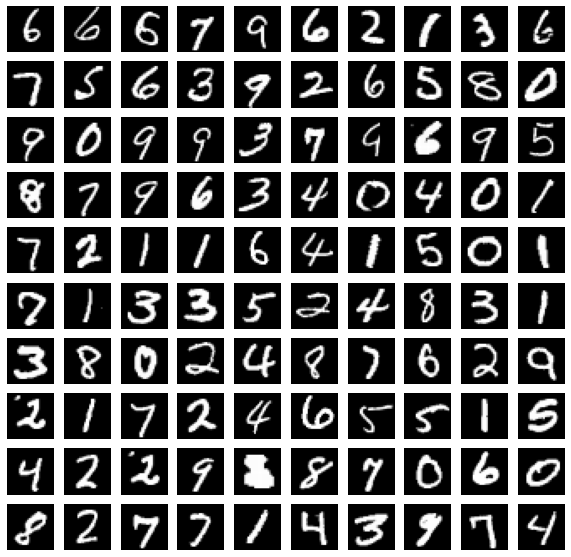

In [5]:
indexes = np.random.randint(0, X_train.shape[0], size=100)
images = X_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(10,10))
for i in range(len(indexes)):
    plt.subplot(10, 10, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.close('all')

I visualised 100 images from the training set. and plot them with matplotlib that has a 10x10 subgraph.

In [6]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Convert labels to numbers that identified their uniqueness.

In [7]:
image_size = X_train.shape[1]
input_size = image_size * image_size
print(input_size)

784


Calculate the image dimension to resize and normalize my X data

In [8]:
# resize and normalize
x_train = np.reshape(X_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(X_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

Converting the image pixel values into float value and performing normalization operation.

In [9]:
# network parameters
batch_size = 128
hidden_units = 256

These are the parameter that I use to adjust the parameter of my neural network layers. I entered some random values to get the most accurate result as I possibly can.

In [10]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size, activation='sigmoid'))
model.add(Dense(hidden_units, activation='sigmoid'))
model.add(Dense(num_labels, activation='softmax'))

I built a sequential Neural Network model with 2 dense layers that use sigmoid activation function and a dense output layer with softmax activation function.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.5666 - accuracy: 0.8457
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2228 - accuracy: 0.9338
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1680 - accuracy: 0.9502
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1309 - accuracy: 0.9606
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1044 - accuracy: 0.9688
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0830 - accuracy: 0.9751
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0679 - accuracy: 0.9800
Epoch 8/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0561 - accuracy: 0.9831
Epoch 9/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0461 - accuracy: 0.9860
Epoch 10/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0384 - accuracy: 0.9884

I configure my neural network model for training
- I set loss to categorical_hinge because Categorical crossentropy loss function is used to compute loss between true labels and predicted labels. This is used for for multiclass classification problems which is perfect for what I want.
- I set optimizer to adam becuase I tried sgd and the result came out much worse than adam
- I set metric to accuracy because This is what I want my result to be as accurate as possible 
Finally I fit my training data into the model. I set epoch to 20 and batch size to 128.

In [13]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Accuracy:', (100.0 * acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.9796
Accuracy: 97.96000123023987


I test with the testing data I compare the predicted value to the real value and the accuracy came out to be 98.2% which is very high.